In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Pavilion\Documents\Coding Languages\Artificial Intelligence\Excel and Csv\Fraud.csv")

In [3]:
df2 = df.copy()
TypeLE = LabelEncoder()
scaler = StandardScaler()
model = RandomForestRegressor(n_estimators = 150)
dtc = DecisionTreeClassifier()
logic = LogisticRegression()

In [4]:
df2.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df2 = df2.drop(columns = ['isFlaggedFraud','newbalanceOrig','newbalanceDest','nameOrig','nameDest']) #Columns Are Redundant

In [7]:
df2

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,1
3,1,CASH_OUT,181.00,181.00,21182.00,1
4,1,PAYMENT,11668.14,41554.00,0.00,0
...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,68488.84,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,1


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   oldbalanceDest  float64
 5   isFraud         int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 291.3+ MB


<Axes: ylabel='step'>

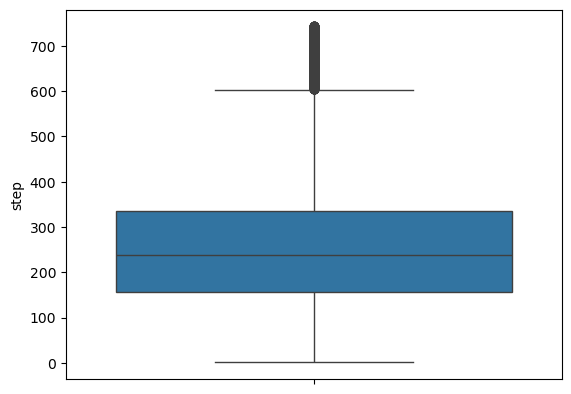

In [9]:
sns.boxplot(df2['step'])

<Axes: ylabel='amount'>

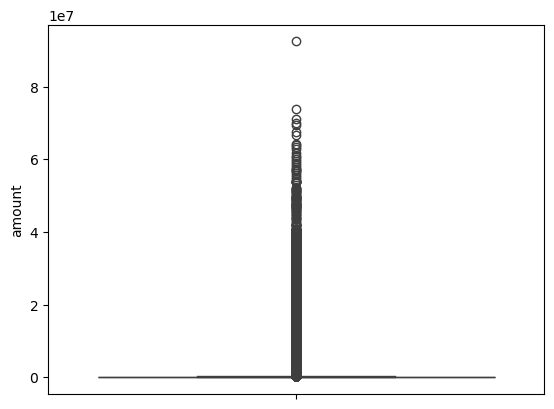

In [10]:
sns.boxplot(df2['amount'])

<Axes: ylabel='oldbalanceDest'>

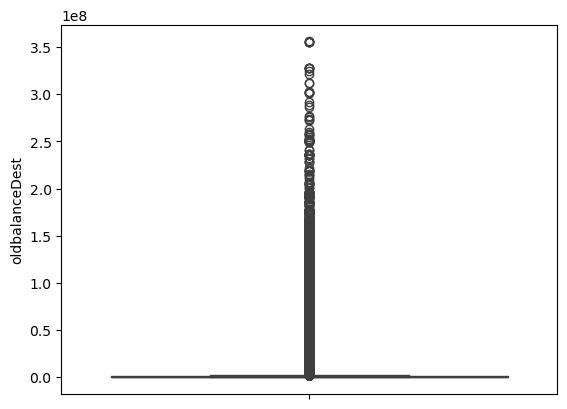

In [11]:
sns.boxplot(df2['oldbalanceDest'])

<Axes: ylabel='isFraud'>

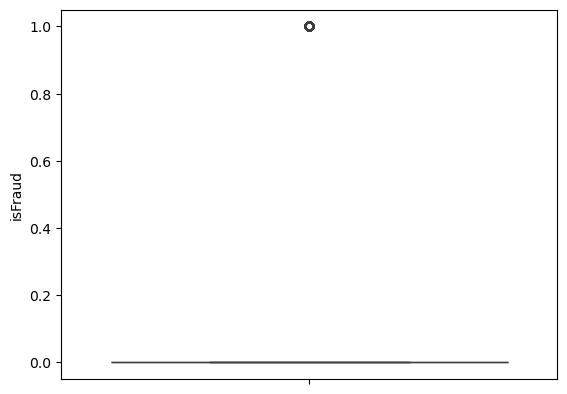

In [12]:
sns.boxplot(df2['isFraud'])

In [13]:
def Outliers(df,columns):
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[(df[i] > upperlimit),i] = upperlimit
        df.loc[(df[i] < lowerlimit),i] = lowerlimit
    return df
cols = ['oldbalanceDest','amount','step']
df2 = Outliers(df2,cols) 

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_15452\1505109924.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '603.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[i] > upperlimit),i] = upperlimit


In [14]:
df2

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1.0,PAYMENT,9839.64000,170136.00,0.000000e+00,0
1,1.0,PAYMENT,1864.28000,21249.00,0.000000e+00,0
2,1.0,TRANSFER,181.00000,181.00,0.000000e+00,1
3,1.0,CASH_OUT,181.00000,181.00,2.118200e+04,1
4,1.0,PAYMENT,11668.14000,41554.00,0.000000e+00,0
...,...,...,...,...,...,...
6362615,603.5,CASH_OUT,339682.13000,339682.13,0.000000e+00,1
6362616,603.5,TRANSFER,501719.33875,6311409.28,0.000000e+00,1
6362617,603.5,CASH_OUT,501719.33875,6311409.28,6.848884e+04,1
6362618,603.5,TRANSFER,501719.33875,850002.52,0.000000e+00,1


In [15]:
df2

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1.0,PAYMENT,9839.64000,170136.00,0.000000e+00,0
1,1.0,PAYMENT,1864.28000,21249.00,0.000000e+00,0
2,1.0,TRANSFER,181.00000,181.00,0.000000e+00,1
3,1.0,CASH_OUT,181.00000,181.00,2.118200e+04,1
4,1.0,PAYMENT,11668.14000,41554.00,0.000000e+00,0
...,...,...,...,...,...,...
6362615,603.5,CASH_OUT,339682.13000,339682.13,0.000000e+00,1
6362616,603.5,TRANSFER,501719.33875,6311409.28,0.000000e+00,1
6362617,603.5,CASH_OUT,501719.33875,6311409.28,6.848884e+04,1
6362618,603.5,TRANSFER,501719.33875,850002.52,0.000000e+00,1


In [16]:
TypeLE.fit(df2['type'])
df2['type'] = TypeLE.transform(df2['type'])

In [17]:
df2

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1.0,3,9839.64000,170136.00,0.000000e+00,0
1,1.0,3,1864.28000,21249.00,0.000000e+00,0
2,1.0,4,181.00000,181.00,0.000000e+00,1
3,1.0,1,181.00000,181.00,2.118200e+04,1
4,1.0,3,11668.14000,41554.00,0.000000e+00,0
...,...,...,...,...,...,...
6362615,603.5,1,339682.13000,339682.13,0.000000e+00,1
6362616,603.5,4,501719.33875,6311409.28,0.000000e+00,1
6362617,603.5,1,501719.33875,6311409.28,6.848884e+04,1
6362618,603.5,4,501719.33875,850002.52,0.000000e+00,1


In [18]:
x = df2.drop(columns = 'isFraud')
y = df2['isFraud']

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70, test_size = 0.3)

In [20]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [21]:
logic.fit(xtrainscaled,ytrain)
logic.score(xtestscaled,ytest)

0.998734797929155

In [22]:
dtc.fit(xtrainscaled,ytrain)
dtc.score(xtestscaled,ytest)

0.9992723123493152

In [ ]:
model.fit(xtrainscaled,ytrain)
model.score(xtestscaled,ytest)